# 03: Extracting data to different formats

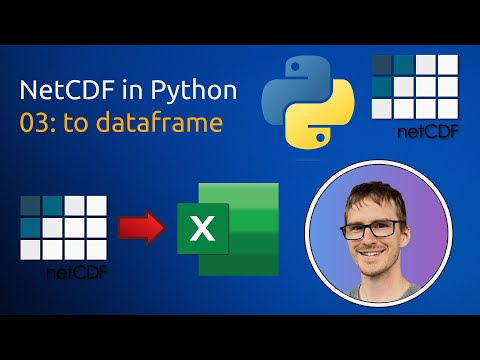

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('rgBqsqwvvcc')

In this notebook, we will look at how we can export data from a NetCDF file into different formats. This will include:
* Exporting data to a numpy array
* Exporting data to a Pandas dataframe that we can write to a CSV or XLSX file

Let's first revist this example from [tutorial #01](01_opening_and_understanding.ipynb), importing a depth profile


In [2]:
import xarray as xr
import numpy as np
import datetime as dt

netcdf_file = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_P1_NLEG01-1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset>
Dimensions:        (PRES: 320)
Coordinates:
  * PRES           (PRES) float32 1.0 2.0 3.0 4.0 ... 317.0 318.0 319.0 320.0
Data variables: (12/33)
    PRES_QC        (PRES) float32 ...
    TEMP           (PRES) float32 ...
    PSAL           (PRES) float32 ...
    FLU2           (PRES) float32 ...
    CNDC           (PRES) float32 ...
    DENS           (PRES) float32 ...
    ...             ...
    OXYOCPVL-1_QC  (PRES) float32 ...
    SPAR_QC        (PRES) float32 ...
    PAR_QC         (PRES) float32 ...
    PSAL-2_QC      (PRES) float32 ...
    TEMP-2_QC      (PRES) float32 ...
    ATTNZS01_QC    (PRES) float32 ...
Attributes: (12/73)
    qc_manual:                       Recommendations for in-situ data Near Re...
    contact:                         datahjelp@hi.no
    distribution_statement:          These data are public and free of charge...
    naming_authority:                no.unis
    license:                         https://creativecommons.org/licenses/by/...
    data_assembly_center:            IMR
    ...                              ...
    station_name:                    P1 (NLEG01)
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    date_created:                    2022-08-08T12:44:34Z
    doi:                             10.21335/NMDC-2085836005-P1_NLEG01-1
    title:                           CTD_station_P1_NLEG01-1_-_Nansen_Legacy_...
    metadata_link:                   https://doi.org/10.21335/NMDC-2085836005...

## Variable with 1 dimension to numpy array

By default when we access the data from a variable, the values are extracted as a NumPy array. Note that we have not needed to import numpy to do this.

In [3]:
myarray = xrds['TEMP'].values
myarray

array([3.735, 3.738, 3.739, 3.741, 3.736, 3.737, 3.736, 3.742, 3.736,
       3.738, 3.783, 3.833, 3.838, 3.837, 3.83 , 3.806, 3.792, 3.79 ,
       3.814, 3.846, 3.858, 3.833, 3.815, 3.817, 3.814, 3.812, 3.792,
       3.709, 3.704, 3.642, 3.582, 3.546, 3.512, 3.484, 3.368, 3.297,
       3.165, 3.106, 3.094, 3.094, 3.102, 3.079, 3.094, 3.076, 3.035,
       3.009, 2.992, 2.981, 2.954, 2.933, 2.903, 2.874, 2.85 , 2.824,
       2.801, 2.787, 2.764, 2.713, 2.711, 2.705, 2.701, 2.696, 2.682,
       2.665, 2.651, 2.647, 2.642, 2.635, 2.624, 2.588, 2.604, 2.608,
       2.593, 2.507, 2.472, 2.468, 2.46 , 2.453, 2.441, 2.43 , 2.431,
       2.43 , 2.431, 2.433, 2.43 , 2.417, 2.394, 2.382, 2.361, 2.335,
       2.32 , 2.303, 2.275, 2.267, 2.263, 2.277, 2.27 , 2.265, 2.262,
       2.256, 2.241, 2.216, 2.201, 2.191, 2.176, 2.135, 2.11 , 2.091,
       2.071, 2.064, 2.103, 2.106, 2.099, 2.095, 2.092, 2.088, 2.082,
       2.085, 2.093, 2.09 , 2.089, 2.085, 2.054, 2.022, 2.019, 2.021,
       2.026, 2.027,

In [4]:
type(myarray)

numpy.ndarray

## Variables with 1 dimension to pandas dataframe

Alternatively, you might want to export the data into a pandas dataframe. Dataframes are essentially tables of data and you can export them easily to CSV or XLSX files.

In [5]:
xrds['TEMP'].to_dataframe()

,TEMP
PRES,
1.0,3.735
2.0,3.738
3.0,3.739
4.0,3.741
5.0,3.736
...,...
316.0,1.287
317.0,1.287
318.0,1.287


See how the relevant coordinate variable has been extracted along with it as the index to the dataframe?

Now let's try several variables together.

In [6]:
xrds[['TEMP', 'PSAL', 'DENS', 'SVEL']].to_dataframe()

,TEMP,PSAL,DENS,SVEL
PRES,,,,
1.0,3.735,34.254002,27.207001,1464.550049
2.0,3.738,34.259998,27.209999,1464.579956
3.0,3.739,34.261002,27.211000,1464.599976
4.0,3.741,34.266998,27.216000,1464.630005
5.0,3.736,34.258999,27.209999,1464.619995
...,...,...,...,...
316.0,1.287,34.916000,27.945000,1459.969971
317.0,1.287,34.916000,27.945000,1459.989990
318.0,1.287,34.916000,27.945000,1460.010010


## Data with multiple dimensions

Let's first revist these data from [tutorial #02](02_creating_plots.ipynb), a global surface temperature anomalies through time.

H.-M. Zhang, B. Huang, J. H. Lawrimore, M. J. Menne, and T. M. Smith (2019): NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0. NOAA National Centers for Environmental Information. doi:10.25921/9qth-2p70 Accessed 2024-01-09.


In [7]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset>
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

Let's create a dataframe that includes all the data and all variables.

In [8]:
df = xrds.to_dataframe()
#df.to_excel('data/exported_from_notebooks/03_temperature_anomalies_all_variables.xlsx') # Too large to write to Excel
#df.to_csv('data/exported_from_notebooks/03_temperature_anomalies_all_variables.csv')
df

anom
time       lat   lon   z        
1880-01-01 -87.5 2.5   0.0   NaN
                 7.5   0.0   NaN
                 12.5  0.0   NaN
                 17.5  0.0   NaN
                 22.5  0.0   NaN
...                          ...
2022-12-01  87.5 337.5 0.0   NaN
                 342.5 0.0   NaN
                 347.5 0.0   NaN
                 352.5 0.0   NaN
                 357.5 0.0   NaN

[4447872 rows x 1 columns]

What about just isolating data for a certain time? We can create a new xarray object that is just a selection of the original.

In [9]:
timeslice = xrds.sel(time=dt.datetime(1970, 1, 1))
timeslice

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 1970-01-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (z, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

You can see that the xarray object above no longer has a time dimension, but maintains a time coordinate variable that contains a single value. Sometimes we don't know if data exist for our selection, so we can access on the nearest data. 

In [10]:
timeslice = xrds.sel(time=dt.datetime(1970, 1, 12), method='nearest')
timeslice

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 1970-01-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (z, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

Notice that the time selected is the beginning of the month we tried to select.

What about selecting by multiple coordinates?

In [11]:
one_location = xrds.sel(lat=23.41,lon=-121.89, method='nearest')
one_location

<xarray.Dataset>
Dimensions:  (time: 1716, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2022-12-01
    lat      float32 22.5
    lon      float32 2.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z) float32 nan nan nan nan nan ... 1.114 0.695 0.5151 3.575
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

This is now a time series of values. Let's write that to a dataframe.

In [12]:
df = one_location.to_dataframe()
df

,,lat,lon,anom
time,z,,,
1880-01-01,0.0,22.5,2.5,NaN
1880-02-01,0.0,22.5,2.5,NaN
1880-03-01,0.0,22.5,2.5,NaN
1880-04-01,0.0,22.5,2.5,NaN
1880-05-01,0.0,22.5,2.5,NaN
...,...,...,...,...
2022-08-01,0.0,22.5,2.5,0.376479
2022-09-01,0.0,22.5,2.5,1.114245
2022-10-01,0.0,22.5,2.5,0.695008


## CTD data published cruise by cruise

What about these CTD data that are published cruise by cruise?

Angelika Renner (2022) CTD data from Nansen Legacy Cruise - JC3 Winter gaps cruise https://doi.org/10.21335/NMDC-675177809

In [13]:
xrds = xr.open_dataset('https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy/NMDC_Nansen-Legacy_PR_CT_58US_2022702.nc')
xrds

<xarray.Dataset>
Dimensions:        (TIME: 29, LATITUDE: 29, LONGITUDE: 29, POSITION: 29,
                    DEPTH: 3555)
Coordinates:
  * TIME           (TIME) datetime64[ns] 2022-02-22T17:47:32 ... 2022-03-11T1...
  * LATITUDE       (LATITUDE) float32 76.0 80.68 80.6 ... 80.39 79.14 78.34
  * LONGITUDE      (LONGITUDE) float32 31.22 33.81 33.56 ... 29.77 8.917 14.47
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/37)
    POSITION_QC    (POSITION) float32 ...
    DIRECTION      object ...
    PRES           (TIME, DEPTH) float32 ...
    PRES_QC        (TIME, DEPTH) float32 ...
    TEMP           (TIME, DEPTH) float64 ...
    PSAL           (TIME, DEPTH) float64 ...
    ...             ...
    SPAR_QC        (TIME, DEPTH) float32 ...
    PAR_QC         (TIME, DEPTH) float32 ...
    PSAL-2_QC      (TIME, DEPTH) float32 ...
    TEMP-2_QC      (TIME, DEPTH) float32 ...
    ATTNZS01_QC    (TIME, DEPTH) float32 ...
    TIME_QC        (TIME) float32 ...
Attributes: (12/67)
    _NCProperties:                  version=2,netcdf=4.7.4,hdf5=1.12.0,
    qc_manual:                      Recommendations for in-situ data Near Rea...
    contact:                        datahjelp@hi.no
    distribution_statement:         These data are public and free of charge....
    naming_authority:               Norwegian Marine Datacenter
    license:                        https://creativecommons.org/licenses/by/4...
    ...                             ...
    creator_name:                   Angelika Renner
    creator_type:                   person
    creator_email:                  angelika.renner@hi.no
    creator_url:                    https://www.hi.no/hi
    publisher:                      The Norwegian Marine Data Centre (NMD)
    publisher_url:                  https://www.nmdc.no/

The file contains many depth profiles. Therefore, most of the data variables have two dimensions; time and depth.

You might notice that there is no depth coordinate variable. Why not? The depth profiles are binned into 1 dbar bins. The density of sea water is a function of sea water and salinity, and so is not constant. So you can't use a single depth variable for all the profiles. 

They could have included pressure as a dimension instead of depth and also included pressure as a coordinate variable.

They could have also published all the depth profiles in separate files. Then each file could include its own depth coordinate variable. It is good practice to publish data with finer granularity because each file can be simpler and thus easier to create, understand, and build services upon. Granularity of data and working with multiple NetCDF files will be focus of [tutorial #05](05_how_to_structure_your_NetCDF_file_or_files.ipynb). 

Let's see what happens now when we try to access a specific depth profile using the method we followed in the section above. 



In [14]:
one_profile = xrds.sel(TIME=dt.datetime(2022, 3, 1,9), method='nearest')
one_profile

<xarray.Dataset>
Dimensions:        (LATITUDE: 29, LONGITUDE: 29, POSITION: 29, DEPTH: 3555)
Coordinates:
    TIME           datetime64[ns] 2022-03-01T06:29:59
  * LATITUDE       (LATITUDE) float32 76.0 80.68 80.6 ... 80.39 79.14 78.34
  * LONGITUDE      (LONGITUDE) float32 31.22 33.81 33.56 ... 29.77 8.917 14.47
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/37)
    POSITION_QC    (POSITION) float32 ...
    DIRECTION      object ...
    PRES           (DEPTH) float32 ...
    PRES_QC        (DEPTH) float32 ...
    TEMP           (DEPTH) float64 ...
    PSAL           (DEPTH) float64 ...
    ...             ...
    SPAR_QC        (DEPTH) float32 ...
    PAR_QC         (DEPTH) float32 ...
    PSAL-2_QC      (DEPTH) float32 ...
    TEMP-2_QC      (DEPTH) float32 ...
    ATTNZS01_QC    (DEPTH) float32 ...
    TIME_QC        float32 ...
Attributes: (12/67)
    _NCProperties:                  version=2,netcdf=4.7.4,hdf5=1.12.0,
    qc_manual:                      Recommendations for in-situ data Near Rea...
    contact:                        datahjelp@hi.no
    distribution_statement:         These data are public and free of charge....
    naming_authority:               Norwegian Marine Datacenter
    license:                        https://creativecommons.org/licenses/by/4...
    ...                             ...
    creator_name:                   Angelika Renner
    creator_type:                   person
    creator_email:                  angelika.renner@hi.no
    creator_url:                    https://www.hi.no/hi
    publisher:                      The Norwegian Marine Data Centre (NMD)
    publisher_url:                  https://www.nmdc.no/

Above you can see that the latitude and longitude dimenions are still equal to 29. This is strange, because a single depth profile should only have 1 latitude and 1 longitude associated with it.

The problem here is that the time latitude and longitude are not explicitely linked to the time. Ideally, there should only be 2 dimensions (time and depth/pressure). The latitude and longitude variables should have a dimension of time.

The data variables look okay - they now only have one dimension, *DEPTH*, where previously they also had a second dimension, *TIME*.

Nevertheless, you might still want to find out what the latitude and longitude of the profile you have accessed is. Here is another method. Let's start by extracting the 5th profile in the dataset.

In [15]:
profile5 = xrds['TEMP'][5].values
print(profile5)
print('time: ',xrds['TIME'][5].values)
print('latitude: ',xrds['LATITUDE'][5].values)
print('longitude: ',xrds['LONGITUDE'][5].values)

[-2.403  3.934 12.479 ...    nan    nan    nan]
time:  2022-03-01T20:43:21.000000000
latitude:  82.0375
longitude:  29.7788


However, often we won't know which number the profile we want to access is. 

We can do this to extract the data closest to a desired time.

In [16]:
desired_time = np.datetime64(dt.datetime(2022, 3, 5, 11)) 

time_var = xrds['TIME'].values # Saving values to a numpy array
time_diff = np.abs(time_var - desired_time) # Difference between each time and our desired time
nearest_index = int(time_diff.argmin().item()) # Find index of time closest to desired time

temperature = xrds['TEMP'][nearest_index].values
latitude = xrds['LATITUDE'][nearest_index].values
longitude = xrds['LONGITUDE'][nearest_index].values
time = xrds['TIME'][nearest_index].values

print(temperature)
print('time: ',time)
print('latitude: ',latitude)
print('longitude: ',longitude)

[-1.68  -1.666 -1.661 ...    nan    nan    nan]
time:  2022-03-05T10:49:14.000000000
latitude:  81.5868
longitude:  30.7572


Now let's instead export multiple variables and multiple depth profiles to a single pandas dataframe.

In [17]:
df = xrds[['TEMP','PSAL', 'PRES', 'SVEL']].to_dataframe()
df.to_excel('../data/exported_from_notebooks/03_ctd_data.xlsx')
df.to_csv('../data/exported_from_notebooks/03_ctd_data.csv')
df

TEMP    PSAL  PRES     SVEL
TIME                DEPTH                              
2022-02-22 17:47:32 0      2.044  34.953   5.0  1458.29
                    1      2.033  34.953   6.0  1458.25
                    2      1.990  34.955   7.0  1458.08
                    3      2.007  34.954   8.0  1458.17
                    4      1.987  34.954   9.0  1458.10
...                          ...     ...   ...      ...
2022-03-11 18:18:43 3550     NaN     NaN   NaN      NaN
                    3551     NaN     NaN   NaN      NaN
                    3552     NaN     NaN   NaN      NaN
                    3553     NaN     NaN   NaN      NaN
                    3554     NaN     NaN   NaN      NaN

[103095 rows x 4 columns]

Notice that in this case both coordinate variables are plotted as individual columns. The data variables are also long columns of data. 